# The Best Markets for Targeted Advertising

In this project I work with an e-learning company that offers courses on programming. Most of the courses are on web and mobile development, but they also cover many other domains, like data science, game development, etc. They want to promote their product and invest some money in advertisement. My goal in this project is to find out the two best markets to advertise their product in.

## Understanding the Data

To reach my goal, I could organize surveys for a couple of different markets to find out which would the best choices for advertising. Before using a significant part of the budget to conduct these surveys, I think it is best to start with freeCodeCamp's 2017 New Coder Survey, which is a free resource.

freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of my analysis.

In [178]:
import pandas as pd
survey_2017 = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',low_memory = 0)

print(survey_2017.shape)
pd.options.display.max_columns = 150
survey_2017.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [179]:
survey_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


## Checking for Sample Representativity

As I mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of my analysis, I want to answer questions about a population of new coders that are interested in the subjects we teach. 

I'd like to know:
- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

What I will now do is isolate the right categories of people as a representative for our population of interest.

In [180]:
survey_2017['JobRoleInterest'].value_counts()

Full-Stack Web Developer                                                                                                                                                                                                                                                    823
  Front-End Web Developer                                                                                                                                                                                                                                                   450
  Data Scientist                                                                                                                                                                                                                                                            152
Back-End Web Developer                                                                                                                                                                  

It looks like:

- A lot of people are interested in web development.
- A few people are interested in mobile development.
- A few people are interested in domains other than web and mobile development.

It's also interesting to note that many respondents are interested in more than one subject. 

Next I'll generate a frequency table for the variable describing the number of options.

In [181]:
survey_2017['JobRoleInterest_count'] = survey_2017['JobRoleInterest'].str.split(',').str.len()
counts = survey_2017['JobRoleInterest_count'].value_counts()
percent = counts / counts.sum()
fmt = '{:.1%}'.format
pd.DataFrame({'counts': counts, 'per': percent.map(fmt)})

,counts,per
1.0,2213,31.7%
3.0,1111,15.9%
4.0,1064,15.2%
5.0,842,12.0%
2.0,761,10.9%
6.0,470,6.7%
7.0,270,3.9%
8.0,123,1.8%
9.0,69,1.0%
10.0,33,0.5%


It turns out that only 31.7% of the participants have a clear idea about what programming niche they'd like to work in, while the majority of students have mixed interests.

The focus of our courses is on web and mobile development, so I'll figure out how many respondents chose at least one of these two options.

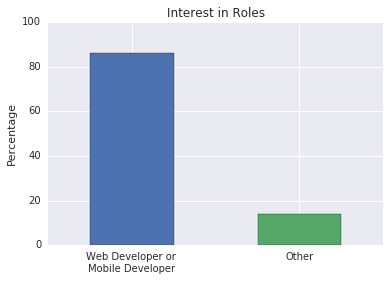

In [182]:
%matplotlib inline

interest = survey_2017['JobRoleInterest'].str.contains('Web Developer|Mobile Developer').value_counts(normalize = True)*100
ax = interest.plot(kind="bar", title="Interest in Roles", ylim=(0,100))
ax.set_ylabel("Percentage")
ax.set_xticklabels(['Web Developer or \n Mobile Developer','Other'], rotation = 'horizontal', wrap=True)


It turns out that most people in this survey (roughly 86%) are interested in either web or mobile development.

## New Coders - Locations and Densities

Now that I found out that the sample has the right categories of people for my purpose, I can begin analyzing it. I can start with finding out where these new coders are located, and what are the densities (how many coders there are) for each location.

In [183]:
survey_2017 = survey_2017[survey_2017['JobRoleInterest'].notna()]

In [184]:
survey_2017['CountryLive'].value_counts().head(50)

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Serbia                             52
Philippines                        52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Singapore                          34
Hungary                            34
New Zealand                        33
Argentina   

In [185]:
counts = survey_2017['CountryLive'].value_counts().head(50)
percent = counts / counts.sum()
fmt = '{:.1%}'.format
pd.DataFrame({'counts': counts, 'per': percent.map(fmt)})

,counts,per
United States of America,3125,48.9%
India,528,8.3%
United Kingdom,315,4.9%
Canada,260,4.1%
Poland,131,2.0%
Brazil,129,2.0%
Germany,125,2.0%
Australia,112,1.8%
Russia,102,1.6%
Ukraine,89,1.4%


## Spending Money for Learning

So far I found useful information about the location of new coders, and what are the countries where new coders live, but I need to go more in depth with my analysis before taking a decision. 

I can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable.

It also seems like a good idea to narrow down my analysis to only four countries: the US, India, the United Kingdom, and Canada. 

Two reasons for this decision are:

- These are the countries with the highest absolute frequencies in the sample, which means I have a decent amount of data for each.
- The courses are written in English, and English is an official language in all four countries.

In [186]:
survey_2017['MonthsProgramming'].replace(0,1, inplace = True)
survey_2017['spent_per_month'] = survey_2017['MoneyForLearning'] / survey_2017['MonthsProgramming']
survey_2017['spent_per_month'].isnull().sum()

675

In [187]:
survey_2017 = survey_2017[survey_2017['spent_per_month'].notnull()]
survey_2017 = survey_2017[survey_2017['CountryLive'].notnull()]
survey_2017['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

In [188]:
survey_2017.groupby('CountryLive').mean().loc[['United States of America','India', 'United Kingdom','Canada']]['spent_per_month']

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: spent_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


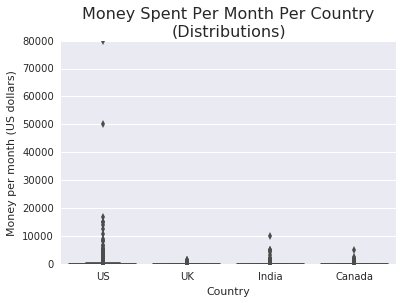

In [189]:
fltrd_2017 = survey_2017[(survey_2017['CountryLive'] == 'United States of America')|
           (survey_2017['CountryLive'] == 'India')|
           (survey_2017['CountryLive'] == 'United Kingdom')|
           (survey_2017['CountryLive'] == 'Canada')]

sns.boxplot(y = 'spent_per_month', x = 'CountryLive',
            data = fltrd_2017)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

## Dealing with Extreme Outliers

The results for the United Kingdom and Canada are surprisingly low relative to the values I see for India. If I considered a few socio-economical metrics (like GDP per capita), I'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that I don't have have enough representative data for the United Kingdom, Canada, and India, or I have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

I decided to remove rows where individuals were spending more than $10,000 a month on their e-learning journey. These would statitically be considered extreme outliers of the dataset.

In [190]:
fltrd_2017 = fltrd_2017[fltrd_2017['spent_per_month'] < 10000]
fltrd_2017.groupby('CountryLive').mean()['spent_per_month']

CountryLive
Canada                      113.510961
India                       113.748387
United Kingdom               45.534443
United States of America    155.459187
Name: spent_per_month, dtype: float64

After further analysis I decided to remove rows where individuals were spending more than $1,000 a month on their learning experience and where they were not using those funds on bootcamps. 

In [191]:
to_drop = fltrd_2017[(fltrd_2017['spent_per_month'] > 1000) & (fltrd_2017['AttendedBootcamp'] == 0)].index 
fltrd_2017.drop(to_drop , inplace=True)

In [192]:
fltrd_2017.groupby('CountryLive').mean()['spent_per_month']

CountryLive
Canada                       83.231052
India                        51.438752
United Kingdom               41.381689
United States of America    125.078576
Name: spent_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


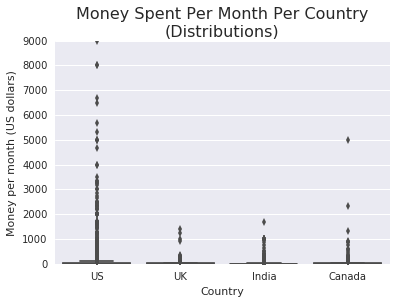

In [193]:
sns.boxplot(y = 'spent_per_month', x = 'CountryLive',
            data = fltrd_2017)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

## Choosing the Two Best Markets

Considering the results I've found so far, one country we should definitely advertise in is the US. There are a lot of new coders living there and they are willing to pay a good amount of money each month.

The company sells subscriptions at a price of \\$59 per month, and Canada seems to be the best second choice because people there are willing to pay roughly \$83 per month, compared to India (\$51) and the United Kingdom (\$41).

The data suggests strongly that we should advertise in the UK, but I'll take a second look at India before deciding to choose Canada as the second best choice.

In [195]:
fltrd_2017['CountryLive'].value_counts(normalize=True)*100

United States of America    74.909091
India                       11.766234
United Kingdom               7.220779
Canada                       6.103896
Name: CountryLive, dtype: float64

It looks like there are almost twice as more potential customers in India than in Canada. 

So it's not clear whether to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

# Conclusion

In this project, I analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion I reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear whether to choose between India and Canada. I decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.